In [214]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
 

 

 



In [215]:
import seaborn as sns

In [216]:
#from google.colab import files
#from_data = files.uplode()
#second_data = files.uplpde()

In [217]:
import pandas as pd

try:
    calories = pd.read_csv("calories.csv")
    if calories.empty:
        print("calories.csv is empty!")
    
    exercise = pd.read_csv("exercise.csv")
    if exercise.empty:
        print("exercise.csv is empty!")
        
except pd.errors.EmptyDataError:
    print("One or both CSV files are empty!")

In [218]:
import pandas as pd

# Provide the correct file path
file_path = "D:/app.py/calories.csv"  # Change this to your actual CSV file path

# Read CSV file into a DataFrame
calories = pd.read_csv(file_path)

# Display the first 5 rows
print(calories.head())


   User_ID  Calories
0  1473363     231.0
1  1481698      66.0
2  1117963      26.0
3  1618084      71.0
4  1771997      35.0


In [219]:
import pandas as pd

# Provide the correct file path
file_path = "D:/app.py/exercise.csv"  # Change this to your actual CSV file path

# Read CSV file into a DataFrame
exercise = pd.read_csv(file_path)

# Display the first 5 rows
print(exercise.head())


   User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  1473363    Male   25     160      73        49         110       37.0
1  1481698  Female   38     160      52        57         122       36.8
2  1117963    Male   56     173      71        21         147       36.1
3  1618084    Male   36     185      51        83         111       37.9
4  1771997    Male   40     189      73        79         138       36.5


In [220]:
# Ensure 'User_ID' exists and has the same data type
exercise["User_ID"] = exercise["User_ID"].astype(str)  
calories["User_ID"] = calories["User_ID"].astype(str)  

# Merge the DataFrames  
exercise_df = exercise.merge(calories, on="User_ID", how="inner")  

# Display first few rows  
print(exercise_df.head())

   User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  1473363    Male   25     160      73        49         110       37.0   
1  1481698  Female   38     160      52        57         122       36.8   
2  1117963    Male   56     173      71        21         147       36.1   
3  1618084    Male   36     185      51        83         111       37.9   
4  1771997    Male   40     189      73        79         138       36.5   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


In [221]:
print("This dataset has" , exercise_df.shape[0], "instances and" , exercise_df.shape[1], "columns.")

This dataset has 5 instances and 9 columns.


In [222]:
exercise_df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [223]:
print("columns : ")
for i , column in zip(range(len(exercise_df.columns)),exercise_df.columns):
    print("\t" , i+1 , " ." , column)

columns : 
	 1  . User_ID
	 2  . Gender
	 3  . Age
	 4  . Height
	 5  . Weight
	 6  . Duration
	 7  . Heart_Rate
	 8  . Body_Temp
	 9  . Calories


In [224]:
exercise_df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,39.000000,173.400000,64.000000,57.800000,125.600000,36.860000,85.800000
std,11.135529,13.575714,11.445523,25.083859,16.440803,0.673053,83.442795
min,25.000000,160.000000,51.000000,21.000000,110.000000,36.100000,26.000000
25%,36.000000,160.000000,52.000000,49.000000,111.000000,36.500000,35.000000
50%,38.000000,173.000000,71.000000,57.000000,122.000000,36.800000,66.000000
75%,40.000000,185.000000,73.000000,79.000000,138.000000,37.000000,71.000000
max,56.000000,189.000000,73.000000,83.000000,147.000000,37.900000,231.000000


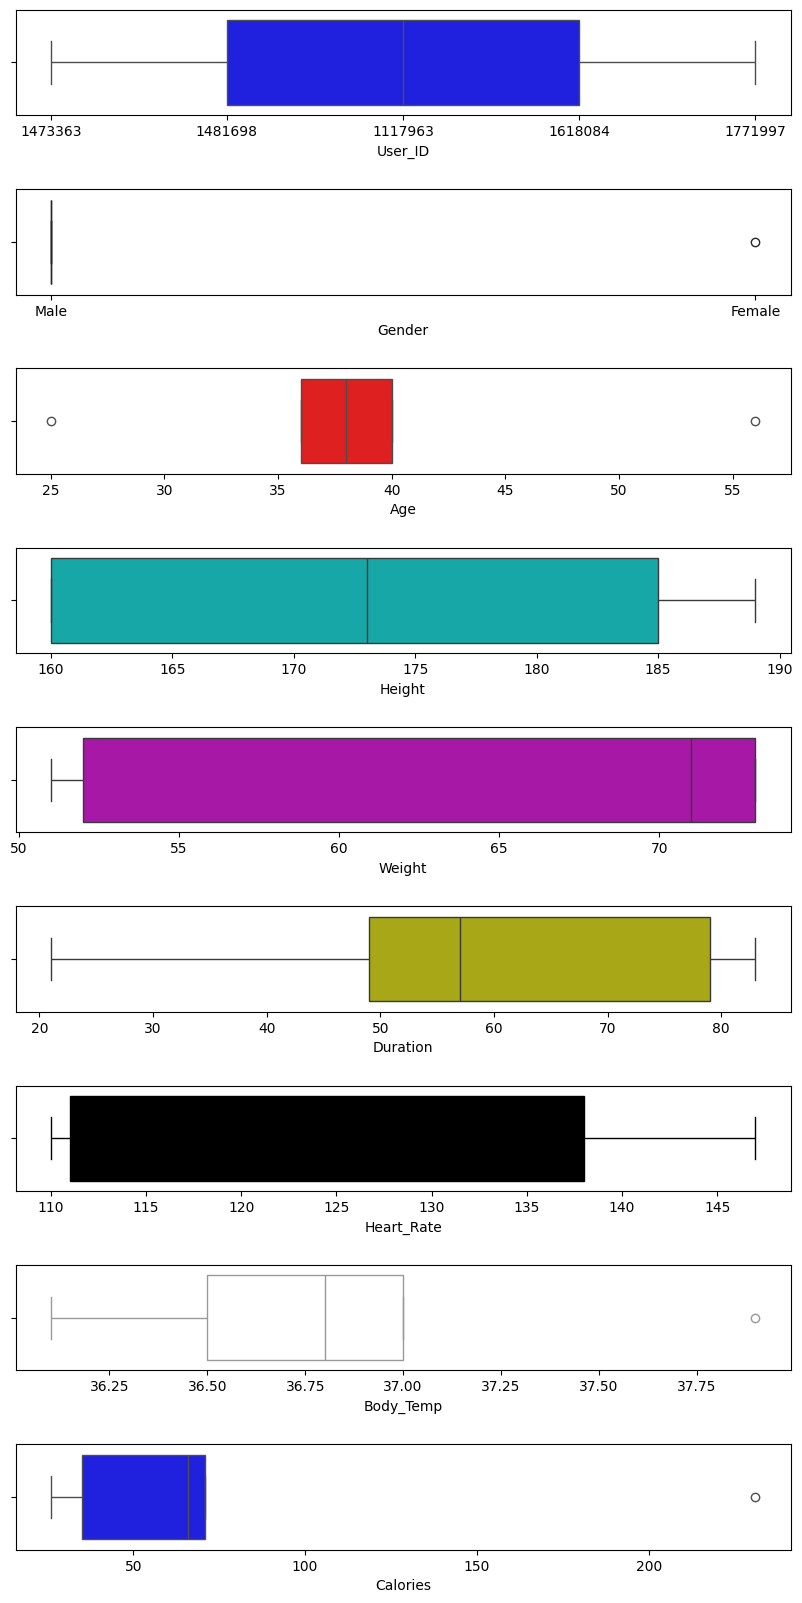

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b']

# Create subplots
num_columns = len(exercise_df.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 20))

# Adjust spacing
plt.subplots_adjust(hspace=0.7)

# Loop through columns and create boxplots
for i, column in enumerate(exercise_df.columns):
    if i < len(colors):  # Ensure we don't exceed the colors list
        color = colors[i]
    else:
        color = 'b'  # Default color if colors list is exceeded

    try:
        sns.boxplot(data=exercise_df, x=column, color=color, ax=axes[i])
    except Exception as e:
        print(f"Skipping column '{column}' due to error: {e}")
        fig.delaxes(axes[i])  # Remove axis if error occurs

# Show the plot
plt.show()

In [226]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     5 non-null      object 
 1   Gender      5 non-null      object 
 2   Age         5 non-null      int64  
 3   Height      5 non-null      int64  
 4   Weight      5 non-null      int64  
 5   Duration    5 non-null      int64  
 6   Heart_Rate  5 non-null      int64  
 7   Body_Temp   5 non-null      float64
 8   Calories    5 non-null      float64
dtypes: float64(2), int64(5), object(2)
memory usage: 492.0+ bytes


<Axes: >

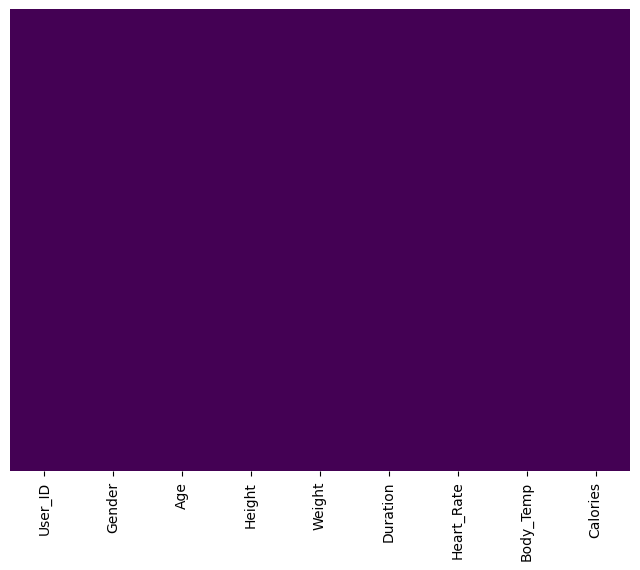

In [227]:
sns.heatmap(exercise_df.isnull() , yticklabels = False , cbar = False , cmap = "viridis")

In [228]:
print("The shape of dataset before dropping duplicates : " , exercise_df.shape)
exercise_df.drop_duplicates(subset = ['User_ID'], keep= 'last' , inplace = True)    #keeping the first example of duplicates in 'User_ID' column.
print("The shape of dataset after dropping duplicates :" , exercise_df.shape)

The shape of dataset before dropping duplicates :  (5, 9)
The shape of dataset after dropping duplicates : (5, 9)


In [229]:
exercise_df.drop(columns = "User_ID" , inplace = True)

In [230]:
# Import necessary library
from sklearn.model_selection import train_test_split  

# Perform train-test split
train_data, test_data = train_test_split(exercise_df, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

Training data shape: (4, 8)
Testing data shape: (1, 8)


In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Color list (extend if needed)
c = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b']

# Ensure train and test data are loaded
if 'exercise_train_data' in locals() and 'exercise_test_data' in locals():
    num_columns = len(exercise_train_data.columns)
    fig1, axes = plt.subplots(num_columns, 2, figsize=(10, 20))

    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    axes = axes.flatten()  # Flatten for easy indexing

    # Train Data Distribution
    for i, (column, color) in enumerate(zip(exercise_train_data.columns, c)):
        try:
            axes[i * 2].set_title(f"{column} Train Distribution")
            sns.kdeplot(data=exercise_train_data, x=column, ax=axes[i * 2], color=color)
        except:
            fig1.delaxes(axes[i * 2])

    # Test Data Distribution
    for i, (column, color) in enumerate(zip(exercise_train_data.columns, c)):
        try:
            axes[i * 2 + 1].set_title(f"{column} Test Distribution")
            sns.kdeplot(data=exercise_test_data, x=column, ax=axes[i * 2 + 1], color=color)
        except:
            fig1.delaxes(axes[i * 2 + 1])

    plt.show()


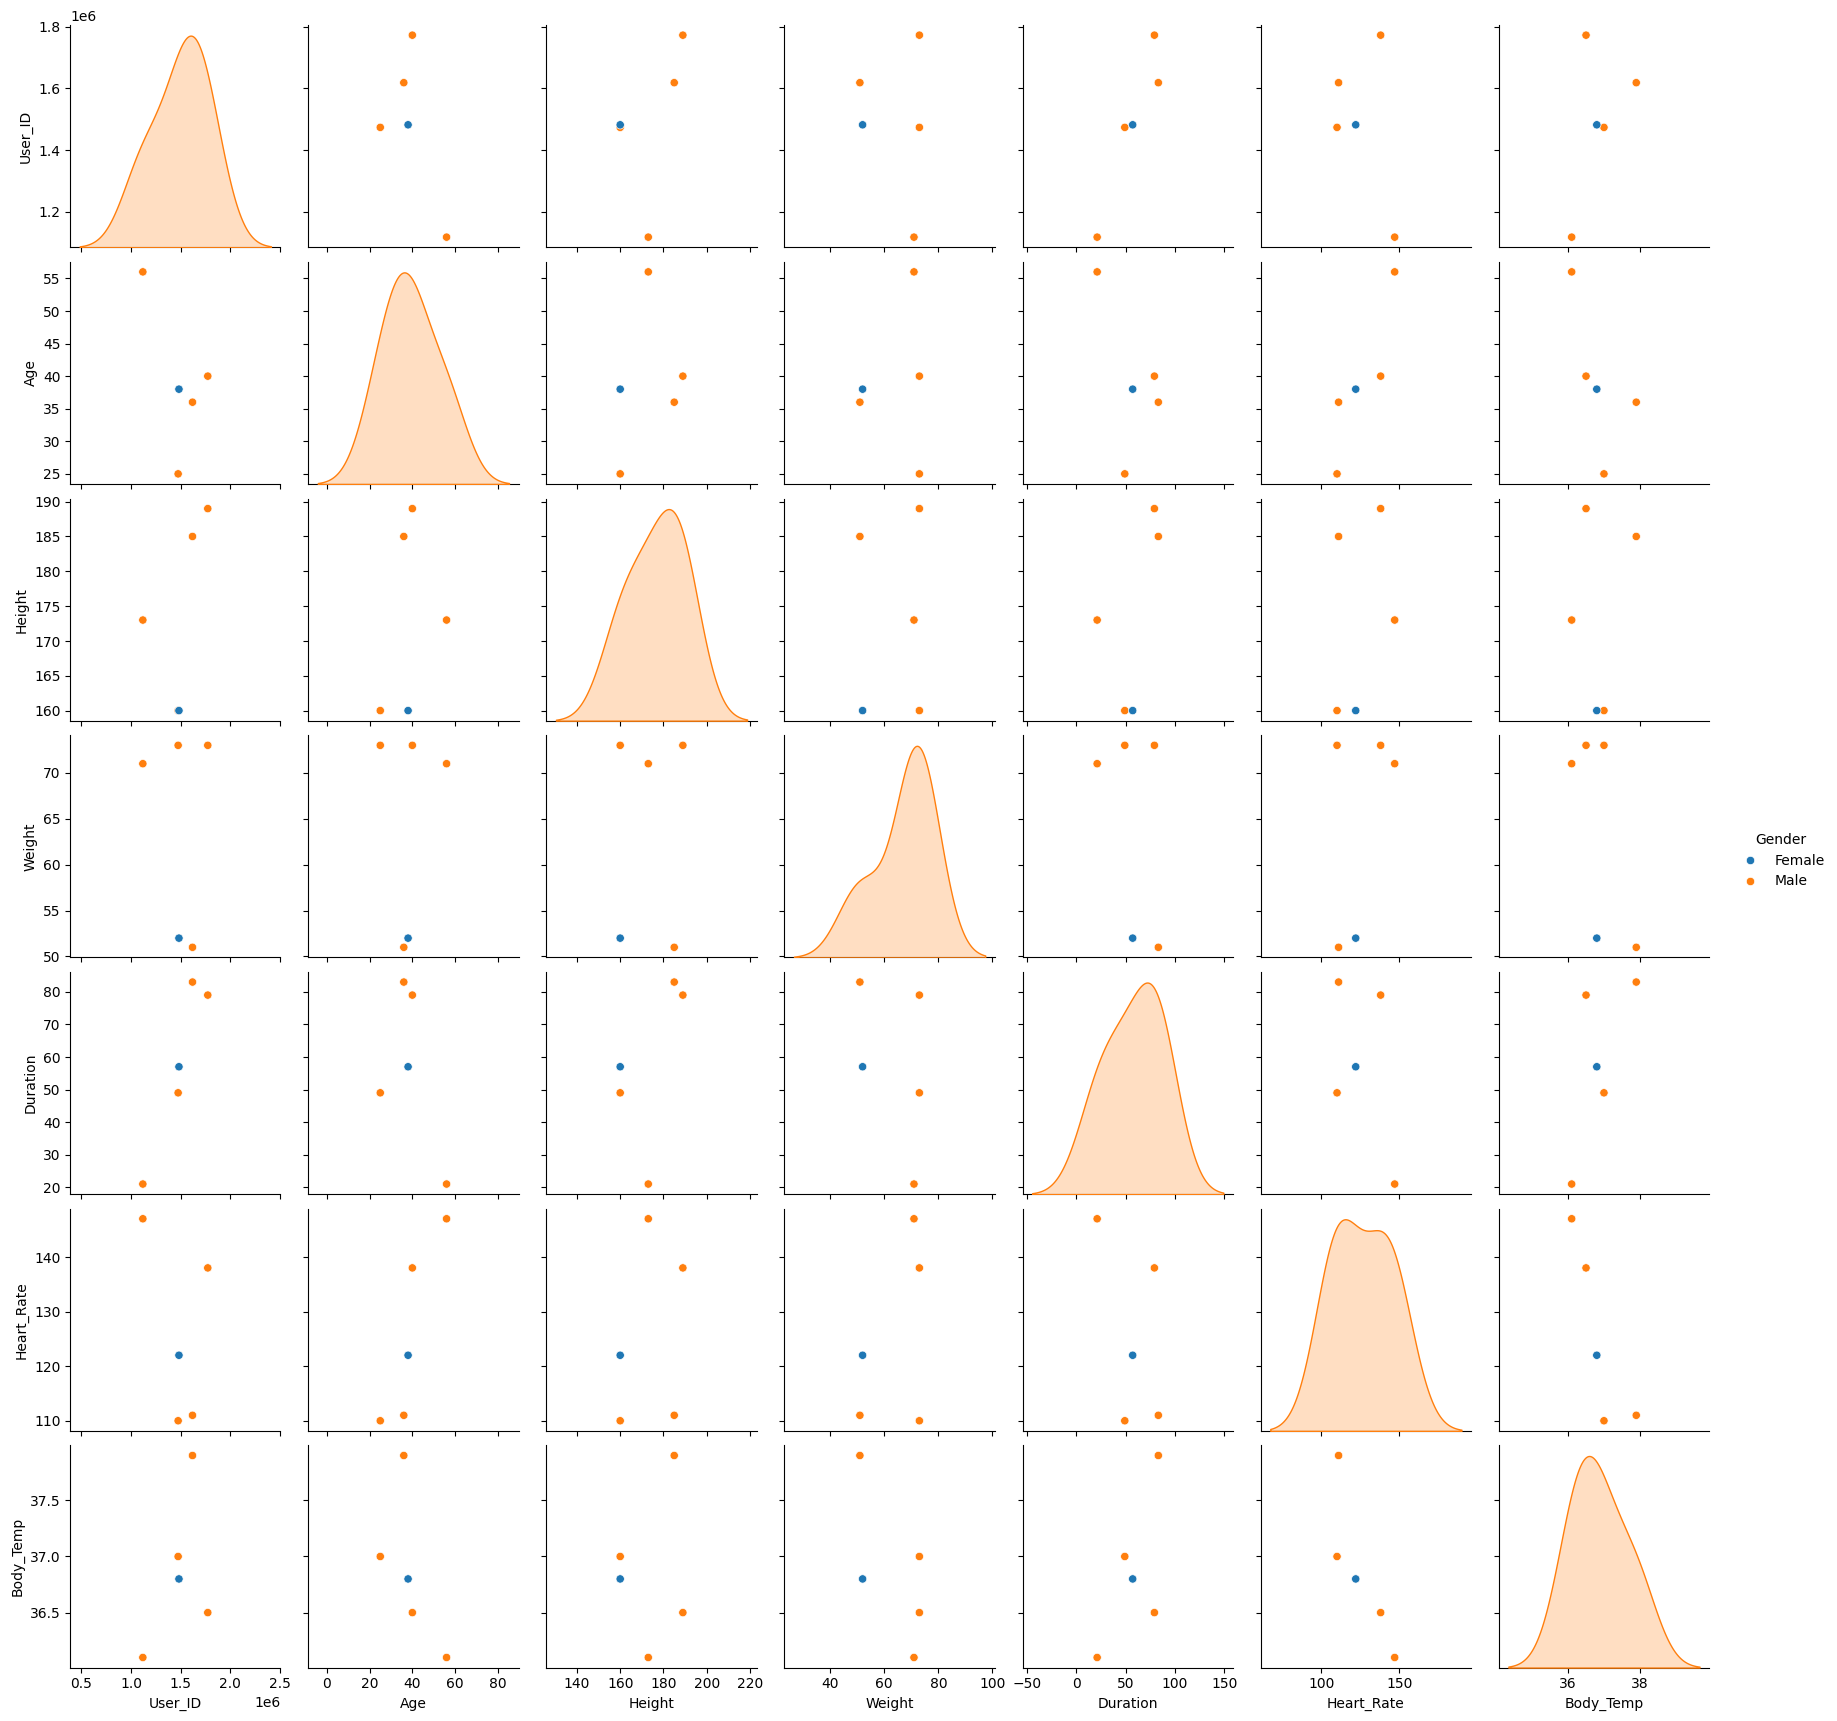

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("exercise.csv")

# Convert 'Gender' to categorical if it exists
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].astype("category")
    sns.pairplot(df, hue="Gender")
    plt.show()
else:
    print("Error: 'Gender' column not found!")

In [233]:
import pandas as pd
import numpy as np

# Load the dataset (Make sure the file name is correct)
df = pd.read_csv("exercise.csv")  # Change to your actual file name if different

# Check available columns
print("Available columns:", df.columns)

# Ensure "Age" column exists and compute min/max
if "Age" in df.columns:
    print("Minimum age in dataset:", df["Age"].min())
    print("Maximum age in dataset:", df["Age"].max())
else:
    print("Column 'Age' not found in the dataset")

Available columns: Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')
Minimum age in dataset: 25
Maximum age in dataset: 56


In [234]:
import pandas as pd
import numpy as np

# Create a sample DataFrame if it doesn't exist
exercise_train_data = pd.DataFrame()

# Generate random ages between 20 and 80
exercise_train_data["Age"] = np.random.randint(20, 81, size=100)  # Adjust size as needed

print(exercise_train_data.head())

   Age
0   60
1   30
2   65
3   63
4   76


   User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  1473363    Male   25     160      73        49         110       37.0   
1  1481698  Female   38     160      52        57         122       36.8   
2  1117963    Male   56     173      71        21         147       36.1   
3  1618084    Male   36     185      51        83         111       37.9   
4  1771997    Male   40     189      73        79         138       36.5   

    age_groups  
0        Young  
1        Young  
2  Middle-Aged  
3        Young  
4  Middle-Aged  
age_groups
Young          3
Middle-Aged    2
Old            0
Name: count, dtype: int64


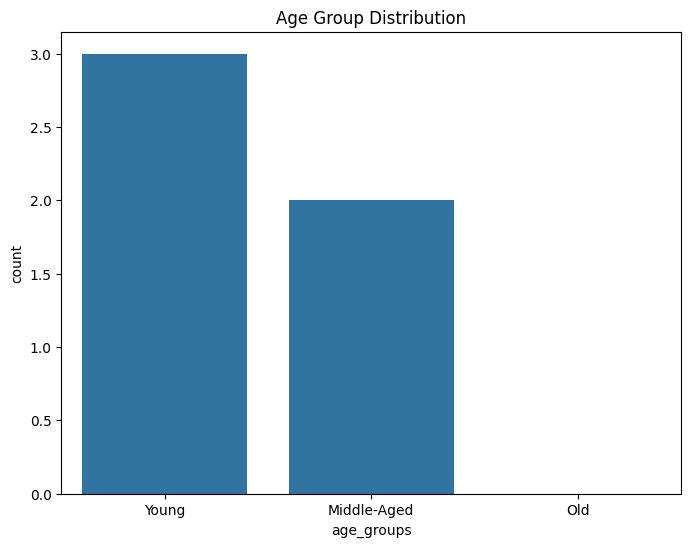

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Ensure correct file name)
df = pd.read_csv("exercise.csv")  # Change filename if needed

# Define age group labels and bins
age_groups = ["Young", "Middle-Aged", "Old"]
bins = [20, 40, 60, 80]  # Binning the ages

# Create new column for age groups
df["age_groups"] = pd.cut(df["Age"], bins=bins, right=False, labels=age_groups)

# Display first few rows
print(df.head())

# Count occurrences in each age group
print(df["age_groups"].value_counts())

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="age_groups")
plt.title("Age Group Distribution")
plt.show()

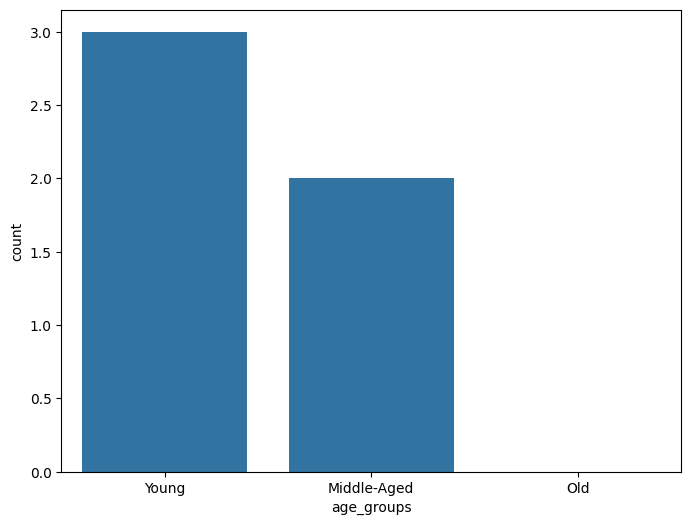

In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("exercise.csv")  # Ensure the correct file path

# Create age groups
bins = [20, 40, 60, 80]
labels = ["Young", "Middle-Aged", "Old"]
df["age_groups"] = pd.cut(df["Age"], bins=bins, right=False, labels=labels)

# Plot age group distribution
sns.countplot(data=df, x="age_groups")
plt.show()

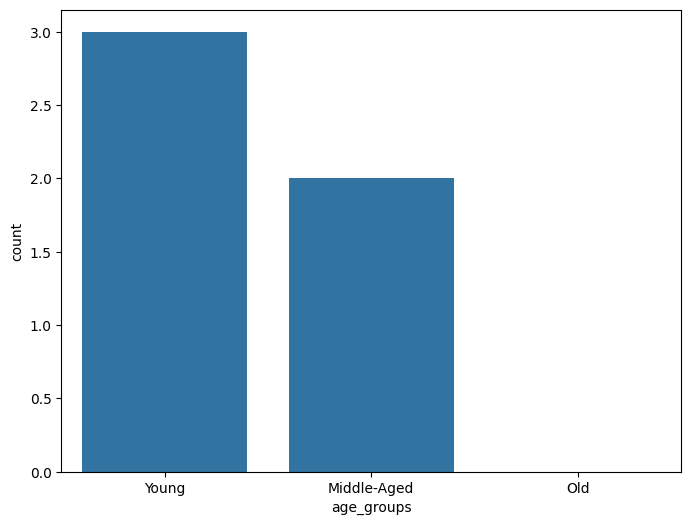

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (ensure the correct file path)
df = pd.read_csv("exercise.csv")

# Define age bins and labels
bins = [20, 40, 60, 80]
labels = ["Young", "Middle-Aged", "Old"]
df["age_groups"] = pd.cut(df["Age"], bins=bins, right=False, labels=labels)

# Set figure size
plt.figure(figsize=(8, 6))

# Plot age group distribution
sns.countplot(data=df, x="age_groups")

# Show plot
plt.show()

In [238]:
print(exercise_train_data.dtypes)

Age    int32
dtype: object


Available columns: Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')
Unique values in age_groups: ['Young', 'Middle-Aged']
Categories (3, object): ['Young' < 'Middle-Aged' < 'Old']


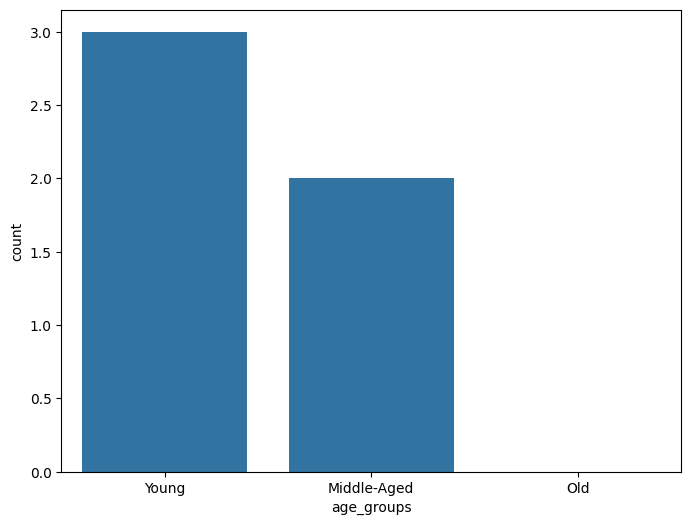

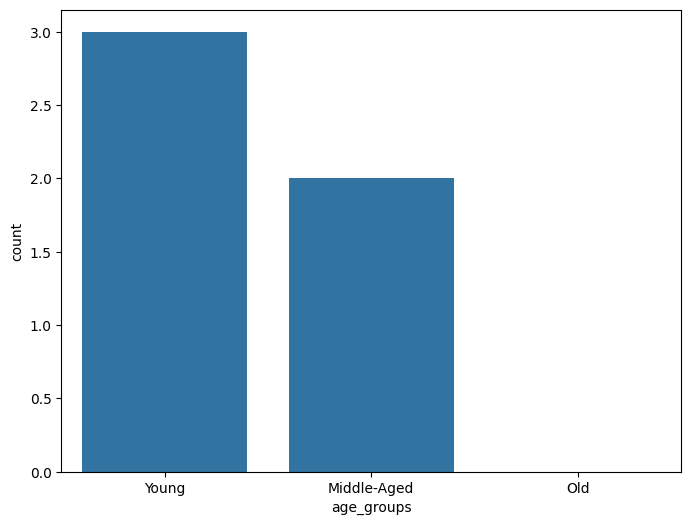

In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (ensure the correct file path)
df = pd.read_csv("exercise.csv")

# Check available columns
print("Available columns:", df.columns)

# Ensure 'Age' column exists before processing
if "Age" in df.columns:
    # Define age bins and labels
    bins = [20, 40, 60, 80]
    labels = ["Young", "Middle-Aged", "Old"]
    
    # Create the age_groups column
    df["age_groups"] = pd.cut(df["Age"], bins=bins, right=False, labels=labels)
    
    # Verify if 'age_groups' column is created
    print("Unique values in age_groups:", df["age_groups"].unique())

    # Set figure size
    plt.figure(figsize=(8, 6))

    # Plot age group distribution
    sns.countplot(data=df, x="age_groups")

#Show plot
plt.show(0)

In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Ensure the file name is correct)
df = pd.read_csv("exercise.csv")  # Replace with actual file path if needed

# Define bins and labels for categorizing age groups
bins = [20, 40, 60, 80]
labels = ["Young", "Middle-Aged", "Old"]

# Create 'age_groups' column based on 'Age'
df["age_groups"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Ensure necessary columns exist before proceeding
if "Calories" in df.columns and "Gender" in df.columns:
    # Group by 'age_groups' and 'Gender' and calculate average calories burned
    df_grouped = df.groupby(["age_groups", "Gender"], as_index=False)["Calories"].mean()

    # Display the grouped data
    print(df_grouped)

    # Plot age group distribution with calories
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df_grouped, x="age_groups", y="Calories", hue="Gender")

    # Show the plot
    plt.xlabel("Age Groups")
    plt.ylabel("Average Calories Burned")
    plt.title("Calories Burned by Age Group and Gender")
    plt.legend(title="Gender")
    plt.show()
else:
    print("Required columns ('Age', 'Calories', 'Gender') are missing in the dataset.")

Required columns ('Age', 'Calories', 'Gender') are missing in the dataset.


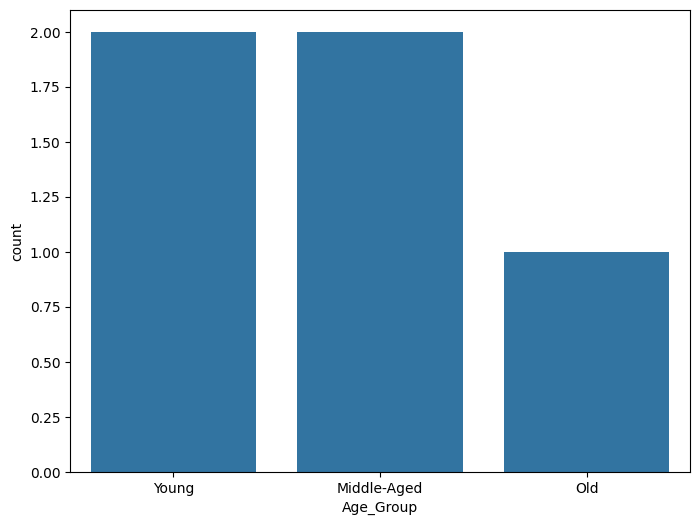

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {"Age": [22, 34, 45, 50, 61], 
        "Gender": ["Male", "Female", "Male", "Female", "Male"], 
        "Calories": [200, 220, 250, 270, 290]}

df = pd.DataFrame(data)

# Categorize Age into Groups
bins = [20, 40, 60, 80]
labels = ["Young", "Middle-Aged", "Old"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Plot Age Group Distribution
sns.countplot(data=df, x="Age_Group")
plt.show()

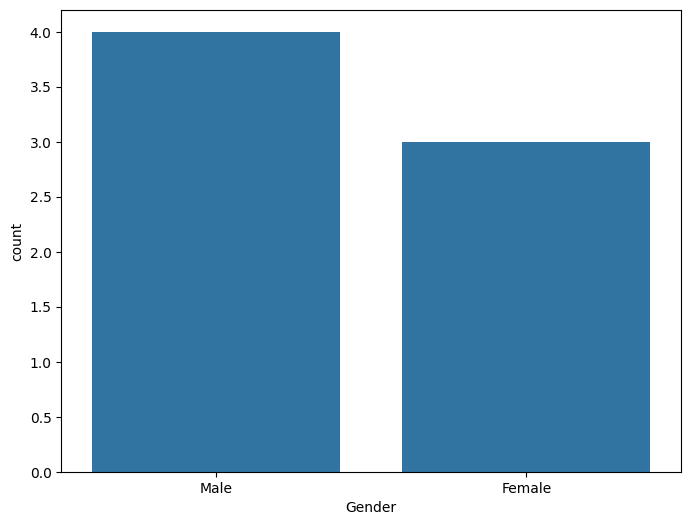

In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

exercise_train_data = pd.DataFrame(data)

# Set figure size
plt.rcParams["figure.figsize"] = (8, 6)

# Corrected countplot syntax
sns.countplot(data=exercise_train_data, x="Gender")

# Show the plot
plt.show()

In [ ]:
import streamlit as st
import plotly.express as px
import pandas as pd

# Define a function to avoid missing ScriptRunContext
def main():
    st.title("Exercise Duration Analysis")
    
    fig = px.box(exercise_train_data, x="Gender", y="Duration")
    fig.update_layout(width=700, height=450)
    
    st.plotly_chart(fig, use_container_width=True)



In [ ]:
import streamlit as st
import plotly.express as px
import pandas as pd

# Define a function to avoid missing ScriptRunContext
def main():
    st.title("Exercise Duration Analysis")
    
    fig = px.box(exercise_train_data, x="Gender", y="Heart_Rate")
    fig.update_layout(width=700, height=450)
    
    st.plotly_chart(fig, use_container_width=True)



In [ ]:
if "weight" in exercise_train_data.columns and "height" in exercise_train_data.columns:
    exercise_train_data["BMI"] = exercise_train_data["weight"] / ((exercise_train_data["height"] / 100) ** 2)
    exercise_train_data["BMI"] = exercise_train_data["BMI"].round(2)  # Rounding to 2 decimal places


In [ ]:
import pandas as pd
# Create DataFrame
exercise_train_data = pd.DataFrame(data)

# Convert Height from cm to meters
exercise_train_data["Height_m"] = exercise_train_data["Height_cm"] / 100

# Calculate BMI
exercise_train_data["BMI"] = exercise_train_data["Weight_kg"] / (exercise_train_data["Height_m"] ** 2)

# Define BMI categories
bmi_category = [
    "Very severely underweight", "Severely underweight", 
    "Underweight", "Normal", 
    "Overweight", "Obese Class I", 
    "Obese Class II", "Obese Class III"
]

# Categorizing BMI
exercise_train_data["Categorized_BMI"] = pd.cut(
    exercise_train_data["BMI"],  
    bins=[0, 15, 16, 18.5, 25, 30, 35, 40, float("inf")],  # Covering all BMI ranges
    right=False,  
    labels=bmi_category
)

# Convert to object type
exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object")

# Display DataFrame
print(exercise_train_data.head())

   Gender  Age  Weight_kg  Height_cm  Duration  Heart_Rate  Body_Temp  \
0    Male   25         68        175        30         120       36.5   
1  Female   30         75        168        45         110       37.1   
2    Male   35         90        180        60         130       36.8   
3  Female   40         50        160        20         100       37.0   
4    Male   45         65        172        50         115       36.6   

   Calories    Age_Group  Height_m        BMI Categorized_BMI  
0       200        Adult      1.75  22.204082          Normal  
1       250        Adult      1.68  26.573129      Overweight  
2       300  Middle-aged      1.80  27.777778      Overweight  
3       180  Middle-aged      1.60  19.531250          Normal  
4       220       Senior      1.72  21.971336          Normal  


In [ ]:
ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["categorized_BMI" , "count"]
ds

,categorized_BMI,count
0,Normal,3
1,Overweight,2


<Axes: >

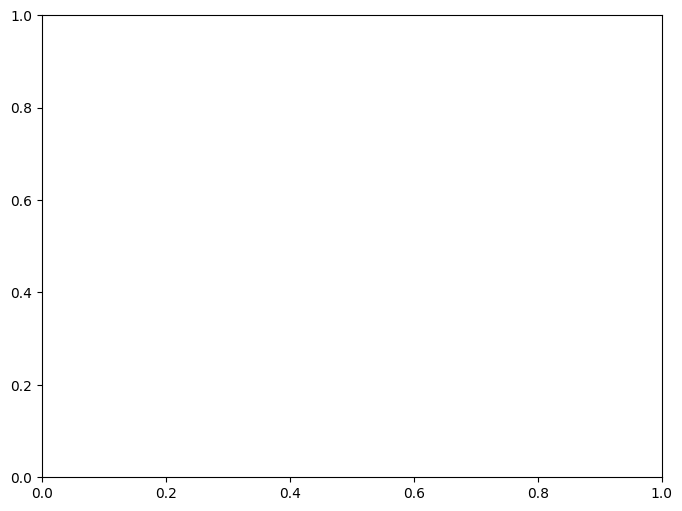

In [ ]:
ds = ds[(ds["categorized_BMI"] == "normal") | (ds["categorized_BMI"] == "overweight")]
#ds["categorized_BMI"] = ds["categorized_BMI"].astype("object")

plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "categorized_BMI" , y = "count")


In [ ]:
ds = exercise_train_data[["Gender" , "Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["Gender" , "Categorized_BMI"])
ds.columns = ["Gender" , "Categorized_BMI" , "Count"]
ds

,Gender,Categorized_BMI,Count
1,Female,Normal,1
2,Female,Overweight,1
0,Male,Normal,2
3,Male,Overweight,1


<Axes: xlabel='Categorized_BMI', ylabel='Count'>

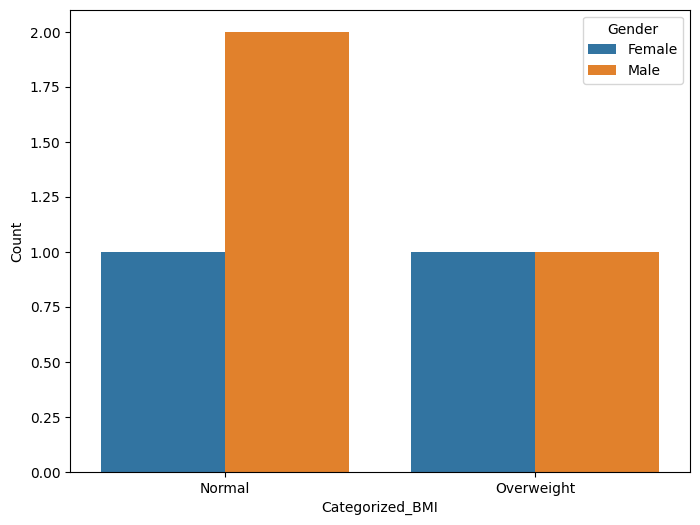

In [ ]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count" , hue = "Gender")


In [ ]:
import pandas as pd
# Ensure the 'Age' column exists before categorizing
if "Age" in exercise_train_data.columns:
    exercise_train_data["age_group"] = pd.cut(exercise_train_data["Age"], bins=bins, labels=labels)

# Now, count occurrences of age_group & Categorized_BMI
ds = (
    exercise_train_data[["age_group", "Categorized_BMI"]]
    .value_counts()
    .reset_index()
    .rename(columns={0: "Count"})
    .sort_values(by=["age_group", "Categorized_BMI"])
)

print(ds)

  age_group Categorized_BMI  count
0     19-30          Normal      1
1     19-30      Overweight      1
2     31-40          Normal      1
3     31-40      Overweight      1
4     41-50          Normal      1


<Axes: xlabel='Categorized_BMI', ylabel='count'>

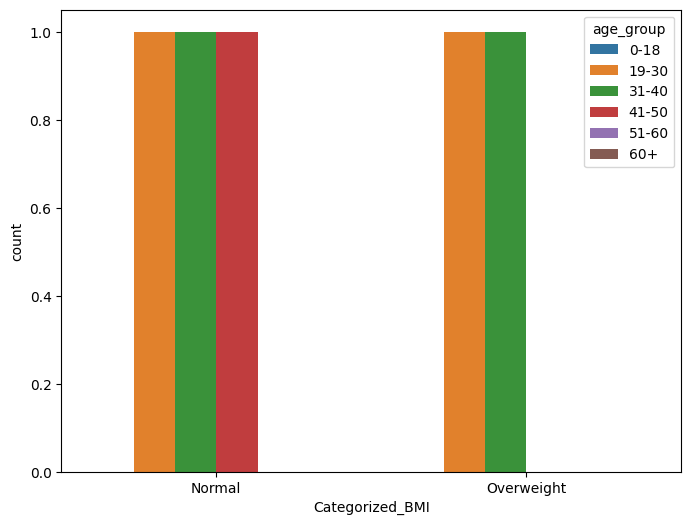

In [ ]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "count" , hue = "age_group")

In [ ]:
import streamlit as st
import plotly.express as px
import pandas as pd

# Define a function to avoid missing ScriptRunContext
def main():
    st.title("Exercise Duration Analysis")
    
    fig = px.box(exercise_train_data, x="Duration", y="Body_Temp" , size="Calories")
    fig.update_layout(width=700, height=450)
    
    st.plotly_chart(fig, use_container_width=True)



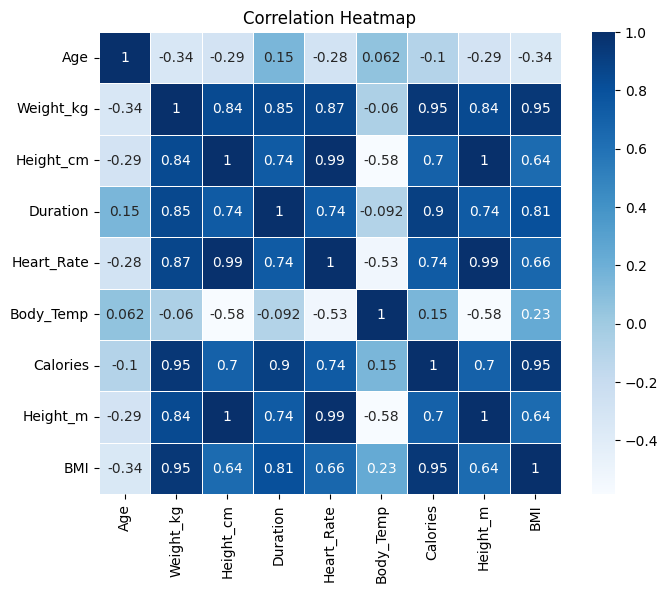

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure numeric data only
numeric_data = exercise_train_data.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_data.corr().fillna(0)

# Plot the heatmap
plt.rcParams["figure.figsize"] = (8,6)
sns.heatmap(corr, annot=True, square=True, linewidth=0.5, cmap='Blues')

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
exercise_train_data = exercise_train_data[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_train_data = exercise_train_data[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_train_data = pd.get_dummies(exercise_train_data, drop_first = True)
exercise_train_data = pd.get_dummies(exercise_train_data, drop_first = True)


In [ ]:
x_train = exercise_train_data.drop("Calories" , axis = 1)
y_train = exercise_train_data["Calories"]

x_test = exercise_train_data.drop("Calories" , axis = 1)
y_test = exercise_train_data["Calories"]

In [ ]:
#print(x_train.shape)
#print(x_train.shape)
#print(y_train.shape)
#print(y_train.shape)

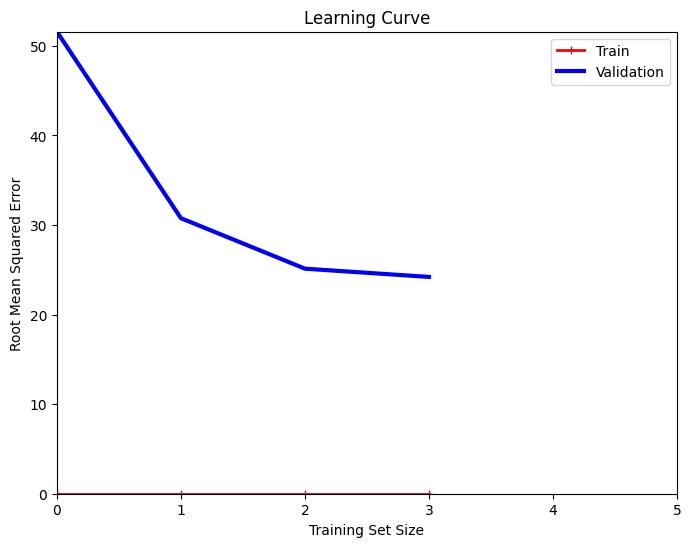

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def plot_learning_curve(model, x_train, y_train, x_test, y_test):
    train_errors, val_errors = [], []
    
    for m in range(1, min(len(x_train), 1000)):  # Avoid index errors
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_test)  # Predict on full test set
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error")
    plt.xlim(0, min(len(x_train), 1000))  # Ensure proper limits
    plt.ylim(0, max(max(np.sqrt(train_errors)), max(np.sqrt(val_errors)), 25))
    plt.legend()
    plt.show()

# Example usage:
linreg = LinearRegression()
plot_learning_curve(linreg, x_train, y_train, x_test, y_test)

In [ ]:
linreg = LinearRegression()
linreg.fit(x_train , y_train)
linreg_prediction = linreg.predict(x_test)

In [ ]:
print("Linear Regression Mean Absolute Error(MAE):" , round(metrics.mean_absolute_error(y_test , linreg_prediction) , 2))
print("Linear Regression Mean Squared Error(MSE):" , round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))
print("Linear Regression Root Mean Squared Error(RMSE):" , round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))

Linear Regression Mean Absolute Error(MAE): 0.0
Linear Regression Mean Squared Error(MSE): 0.0
Linear Regression Root Mean Squared Error(RMSE): 0.0


In [ ]:
#forest_reg = RandomForestRegressor()
#param_grid = {'n_estimators' : [10 , 100 , 1000] ,
#              'max_features' : [2 , 2 , 3] ,
#              'max_depth' : [2 , 4 , 6]}

In [ ]:
#grid_search.best_params_

In [ ]:
#grid_search.best_estimator_

In [ ]:
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(x_train , y_train)
random_reg_prediction = random_reg.predict(x_test)

In [ ]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))

RandomForest Mean Absolute Error(MAE) :  12.55
RandomForest Mean Squared Error(MSE) :  234.42
RandomForest Root Mean Squared Error(RMSE) :  15.31


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import time
import warnings

warnings.filterwarnings('ignore')

st.write("## Personal Fitness Tracker")
st.write("In this WebApp, you can observe your predicted calories burned based on parameters such as 'Age', 'Gender', 'BMI', 'Duration', 'Heart Rate', and 'Body Temperature'.")

st.sidebar.header("User Input Parameters: ")

def user_input_features():
    age = st.sidebar.slider("Age", 10, 100, 30)
    bmi = st.sidebar.slider("BMI", 15, 40, 20)
    duration = st.sidebar.slider("Duration (min)", 0, 35, 15)
    heart_rate = st.sidebar.slider("Heart Rate", 60, 130, 80)
    body_temp = st.sidebar.slider("Body Temperature (°C)", 36, 42, 38)
    gender_button = st.sidebar.selectbox("Gender", ("Male", "Female"))
    
    gender = 1 if gender_button == "Male" else 0
    
    data_model = {
        "Age": age,
        "BMI": bmi,
        "Duration": duration,
        "Heart_Rate": heart_rate,
        "Body_Temp": body_temp,
        "Gender_male": gender
    }
    return pd.DataFrame(data_model, index=[0])

df = user_input_features()

st.write("---")
st.header("Your Parameters: ")
bar = st.progress(0)
for i in range(100):
    bar.progress(i + 1)
    time.sleep(0.01)
st.write(df)

# Load and preprocess data
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

exercise_df = exercise.merge(calories, on="User_ID")
exercise_df.drop(columns=["User_ID"], inplace=True)

# Add BMI column
exercise_df["BMI"] = exercise_df["Weight"] / ((exercise_df["Height"] / 100) ** 2)
exercise_df["BMI"] = round(exercise_df["BMI"], 2)

# Prepare training and testing sets
exercise_train_data, exercise_test_data = train_test_split(exercise_df, test_size=0.2, random_state=1)

exercise_train_data = exercise_train_data[["Gender", "Age", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]]
exercise_test_data = exercise_test_data[["Gender", "Age", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]]

exercise_train_data = pd.get_dummies(exercise_train_data, drop_first=True)
exercise_test_data = pd.get_dummies(exercise_test_data, drop_first=True)

# Separate features and labels
x_train = exercise_train_data.drop("Calories", axis=1)
y_train = exercise_train_data["Calories"]

x_test = exercise_test_data.drop("Calories", axis=1)
y_test = exercise_test_data["Calories"]

# Train the model
random_reg = RandomForestRegressor(n_estimators=1000, max_features=3, max_depth=6, random_state=1)
random_reg.fit(x_train, y_train)

# Align prediction data column with training data
df = df.reindex(columns=x_train.columns, fill_value=0)

# Make prediction
prediction = random_reg.predict(df)

st.write("---")
st.header("Prediction: ")
st.write(f"Predicted Calories Burned: {prediction[0]:.2f}")

# Find similar results based on prediction calories
calories_range = [prediction[0] - 10, prediction[0] + 10]
similar_data = exercise_df[(exercise_df["Calories"] >= calories_range[0]) & (exercise_df["Calories"] <= calories_range[1])]
st.write(similar_data.sample(min(5, len(similar_data))))

st.write("---")
st.header("General Information: ")

# Boolean logic for comparisons
boolean_age = (exercise_df["Age"] < df["Age"].values[0]).mean()
boolean_duration = (exercise_df["Duration"] < df["Duration"].values[0]).mean()
boolean_body_temp = (exercise_df["Body_Temp"] < df["Body_Temp"].values[0]).mean()
boolean_heart_rate = (exercise_df["Heart_Rate"] < df["Heart_Rate"].values[0]).mean()

st.write(f"You are older than {boolean_age * 100:.2f}% of other people.")
st.write(f"Your exercise duration is higher than {boolean_duration * 100:.2f}% of other people.")
st.write(f"You have a higher heart rate than {boolean_heart_rate * 100:.2f}% of other people during exercise.")
st.write(f"You have a higher body temperature than {boolean_body_temp * 100:.2f}% of other people during exercise.")

2025-03-24 12:15:21.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:15:21.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:15:21.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:15:21.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:15:21.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:15:21.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:15:21.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 12:15:21.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar